In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns

In [4]:
df=pd.read_csv('Walmart.csv')

In [25]:
df.head(10)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11,Weekday
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11,Holiday
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11,Weekday
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11,Weekday
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11,Weekday
5,1,12-03-2010,1439541.59,0,57.79,2.67,211.38,8.11,Weekday
6,1,19-03-2010,1472515.79,0,54.58,2.72,211.22,8.11,Weekday
7,1,26-03-2010,1404429.92,0,51.45,2.73,211.02,8.11,Weekday
8,1,02-04-2010,1594968.28,0,62.27,2.72,210.82,7.81,Weekday
9,1,09-04-2010,1545418.53,0,65.86,2.77,210.62,7.81,Weekday


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
pd.set_option('display.float_format','{:.2f}'.format)
df.groupby('Store')['Weekly_Sales'].sum()

Store
1    222402808.85
2    275382440.98
3     57586735.07
4    299543953.38
5     45475688.90
6    223756130.64
7     81598275.14
8    129951181.13
9     77789218.99
10   271617713.89
11   193962786.80
12   144287230.15
13   286517703.80
14   288999911.34
15    89133683.92
16    74252425.40
17   127782138.83
18   155114734.21
19   206634862.10
20   301397792.46
21   108117878.92
22   147075648.57
23   198750617.85
24   194016021.28
25   101061179.17
26   143416393.79
27   253855916.88
28   189263680.58
29    77141554.31
30    62716885.12
31   199613905.50
32   166819246.16
33    37160221.96
34   138249763.00
35   131520672.08
36    53412214.97
37    74202740.32
38    55159626.42
39   207445542.47
40   137870309.79
41   181341934.89
42    79565752.43
43    90565435.41
44    43293087.84
45   112395341.42
Name: Weekly_Sales, dtype: float64

In [9]:
df.groupby('Store')['Weekly_Sales'].mean()

Store
1    1555264.40
2    1925751.34
3     402704.44
4    2094712.96
5     318011.81
6    1564728.19
7     570617.31
8     908749.52
9     543980.55
10   1899424.57
11   1356383.12
12   1009001.61
13   2003620.31
14   2020978.40
15    623312.47
16    519247.73
17    893581.39
18   1084718.42
19   1444999.04
20   2107676.87
21    756069.08
22   1028501.04
23   1389864.46
24   1356755.39
25    706721.53
26   1002911.84
27   1775216.20
28   1323522.24
29    539451.43
30    438579.62
31   1395901.44
32   1166568.15
33    259861.69
34    966781.56
35    919724.98
36    373511.99
37    518900.28
38    385731.65
39   1450668.13
40    964128.04
41   1268125.42
42    556403.86
43    633324.72
44    302748.87
45    785981.41
Name: Weekly_Sales, dtype: float64

In [10]:
df['Week']=np.where(df['Holiday_Flag']==1,'Holiday','Weekday')

In [11]:
df.groupby('Week')['Weekly_Sales'].sum()

Week
Holiday    505299551.56
Weekday   6231919435.55
Name: Weekly_Sales, dtype: float64

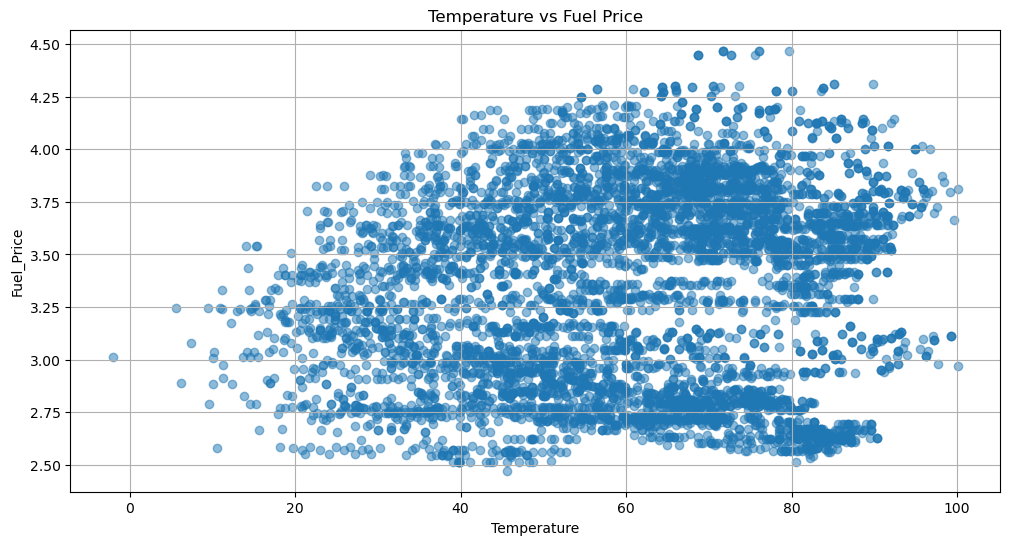

In [12]:
plt.figure(figsize=(12,6))
plt.scatter(df['Temperature'],df['Fuel_Price'],alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("Fuel_Price")
plt.title("Temperature vs Fuel Price")
plt.grid(True)
plt.show()

<Axes: >

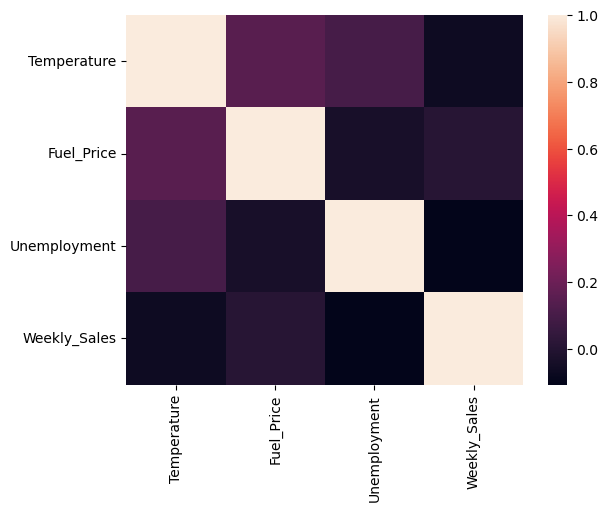

In [18]:
sns.heatmap(df[['Temperature','Fuel_Price','Unemployment','Weekly_Sales']].corr())

### Weekly Sales don't have high correlation with any of the attributes. So these have not affect too much the sales.

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

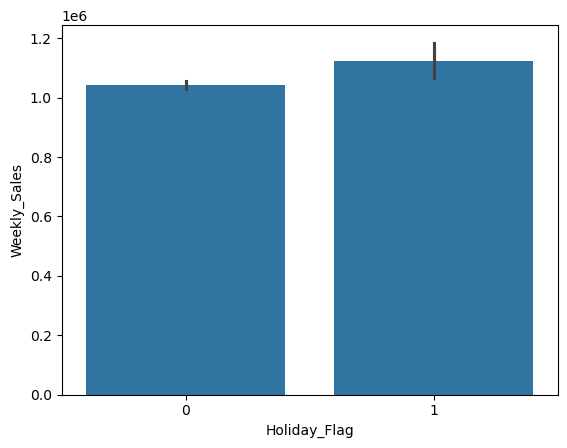

In [32]:
sns.barplot(x='Holiday_Flag',y='Weekly_Sales',data=df)

### Holidays have more sales compared to weekdays


Text(0.5, 1.0, 'Comparison of Total Weekly Sales of each store')

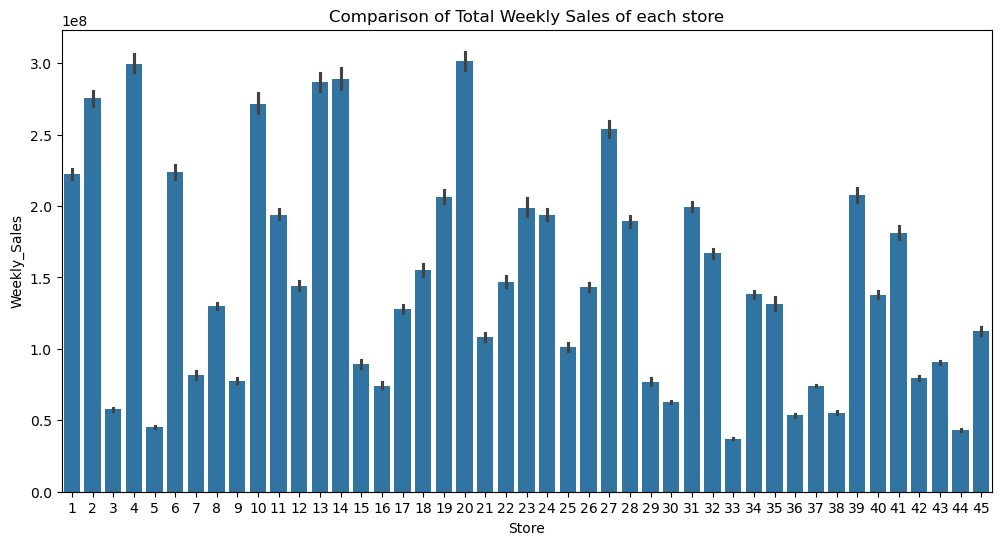

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x='Store',y='Weekly_Sales',data=df,estimator=sum)
plt.title('Comparison of Total Weekly Sales of each store')

###  20,14,4,13 are one of highest selling shops. 5,33,44 and 3 have very poor sales 

# DAILY TREND OF SALES

In [30]:
s=df.groupby('Date')['Weekly_Sales'].sum().reset_index()

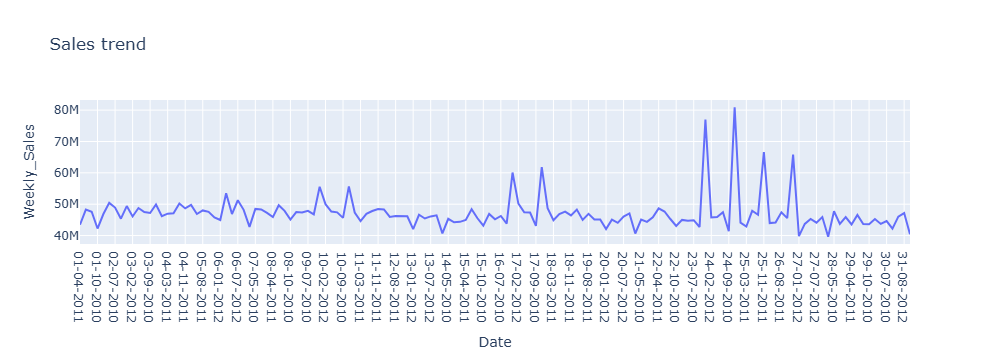

In [33]:
import plotly.express as px
fig=px.line(s,x='Date',y='Weekly_Sales',title="Sales trend")
fig.show()

###  24-12-2010 has highest sales. 

### 28-01-2011 has lowest sales